## Цель: изучить исходные данные, выявить проблемы и понять закономерности.

В этом ноутбуке проводится первичный анализ данных (EDA) для набора Telco Customer Churn.
Основная задача — получить общее представление о структуре данных, убедиться в корректности загрузки, выявить возможные проблемы и понять распределение ключевых признаков.

Загружаем исходный CSV-файл и выводим первые строки `(head())`, чтобы убедиться, что файл прочитан корректно.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Также выводятся:

- общая информация `(info())`

- типы данных всех колонок

- базовые статистики `(describe())`

- количество уникальных значений


Это позволяет быстро понять:

- какие признаки числовые, а какие категориальные

- есть ли проблемы с типами

- какие признаки могут требовать преобразования

In [3]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


`df.isna().sum()` позволяет оценить пропущенные значения.
Явных NaN нет, но позже станет ясно, что колонка **TotalCharges** содержит пустые строки `' '` вместо настоящих пропусков.
Поэтому её тип определяется как object, хотя логически это числовой признак.

In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Построена диаграмма `countplot` для признака **Churn** ("ушёл клиент или нет").

Это прямо показывает сколько клиентов ушло

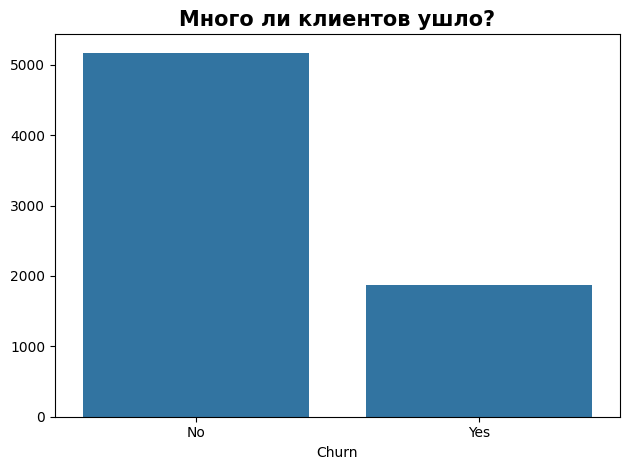

In [7]:
sns.countplot(df, x = "Churn")
plt.title("Много ли клиентов ушло?", fontsize = 15, fontweight='bold')
plt.ylabel("")
plt.tight_layout()

Построена диаграмма `countplot` для признака **Contract**

Наглядно показано какие типы контрактов преобладают

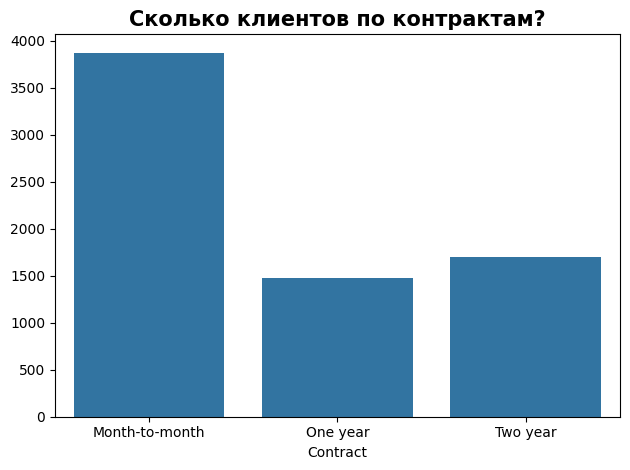

In [8]:
sns.countplot(df, x = "Contract")
plt.title("Сколько клиентов по контрактам?", fontsize = 15, fontweight='bold')
plt.ylabel("")
plt.tight_layout()

Построены гистограммы для:

**tenure** - стаж клиента в месяцах

**MonthlyCharges** - ежемесячные платежи

Эти графики позволяют понять:

- наличие выбросов

- характер распределения

- потенциальные зоны риска: например, клиенты с маленьким tenure часто уходят

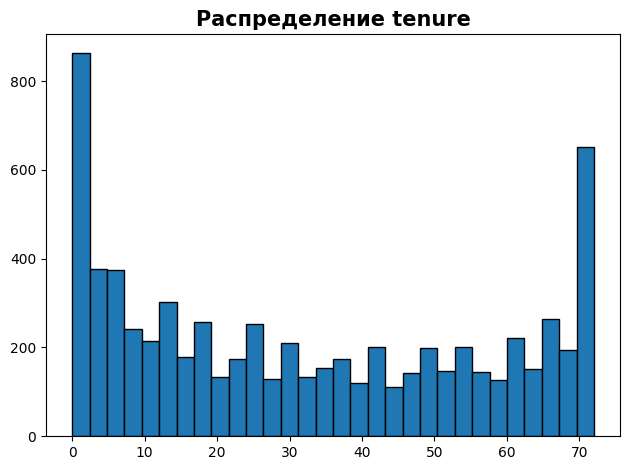

In [9]:
df['tenure'].plot(kind = 'hist', bins = 30, edgecolor = 'black')
plt.ylabel("")
plt.title("Распределение tenure", fontsize = 15, fontweight='bold')
plt.tight_layout()

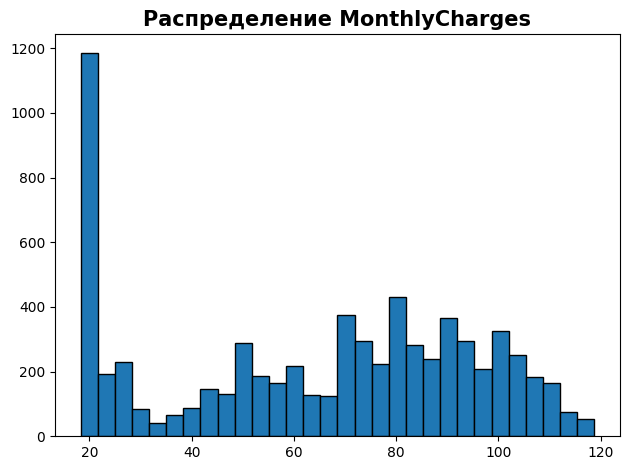

In [10]:
df['MonthlyCharges'].plot(kind = 'hist', bins = 30, edgecolor = 'black')
plt.ylabel("")
plt.title("Распределение MonthlyCharges", fontsize = 15, fontweight='bold')
plt.tight_layout()

Вычислена корреляция между числовыми признаками:

**tenure**

**MonthlyCharges**

Колонка **TotalCharges** не включена, потому что на этом этапе она имеет тип `object` из-за некорректных значений.
Её обработка выполняется во втором ноутбуке (Data Cleaning).

Корреляция на этом этапе носит ознакомительный характер.

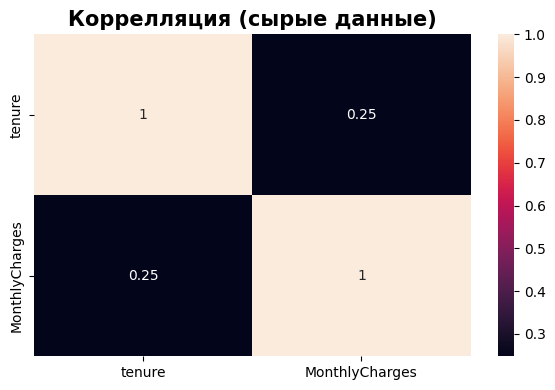

In [14]:
num_cols = ['tenure','MonthlyCharges']
plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True)
plt.title("Коррелляция (сырые данные)", fontsize = 15, fontweight='bold')
plt.tight_layout()

### Итоги:

- Датасет загружается корректно, структура данных понятна.

- Пропусков в виде NaN нет, но колонка **TotalCharges** содержит некорректные типы данных - потребуется очистка.

- Типы контрактов различаются существенно: большинство клиентов находятся на месячном контракте.

- Распределения **tenure** и **MonthlyCharges** показывают неравномерность и возможные зависимости с вероятностью ухода.